In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Timing Momentum Factor 

In [5]:
df = pd.read_excel("data/usdt_pairs_update.xlsx")
df["time"] = pd.to_datetime(df["time"])
df = df[df["ticker"].isin(["BTCUSDT","ETHUSDT"])]
wide_df = df.pivot_table(columns=["ticker"],index=["time"],values=["close"])

In [6]:
signal_df = wide_df.pct_change(1).shift(1)
ret_df = wide_df.pct_change(1)

In [7]:
signal_df.columns = ["BTCUSDT","ETHUSDT"]
ret_df.columns = ["BTCUSDT","ETHUSDT"]

In [8]:
max_daily_ret = signal_df.max(axis=1)

def check(x):
    
    signal = x == max_daily_ret
    return signal


signal = signal_df.apply(check)

In [9]:
port_ret = ret_df[signal].fillna(0)
port_ret = port_ret.sum(axis=1)

In [81]:
port_cum = (port_ret+1).cumprod()
trending_signal = port_cum.pct_change(5).shift(1)

In [82]:
new_port_ret = port_ret.copy()
new_port_ret[trending_signal<0] = 0

In [83]:
result = pd.concat([ret_df,port_ret,new_port_ret],axis=1)
result.columns = ["BTCUSDT","ETHUSDT","port_ret","timing_port_ret"]

In [84]:
result_cum = (result+1).cumprod()

<AxesSubplot:xlabel='time'>

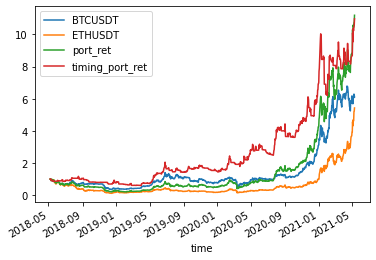

In [85]:
result_cum.plot()

In [87]:
result.mean()/result.std()

BTCUSDT            0.062892
ETHUSDT            0.056475
port_ret           0.072430
timing_port_ret    0.083319
dtype: float64

### Test 2

In [103]:
sub_result = result[result.index.to_series().between("2018-01-01","2019-01-01")]

In [104]:
sub_result_cum = (sub_result+1).cumprod()

<AxesSubplot:xlabel='time'>

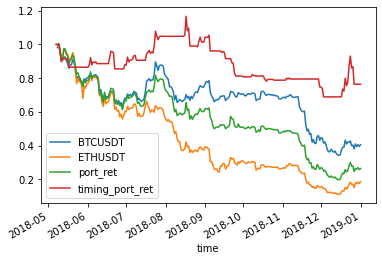

In [105]:
sub_result_cum.plot()

In [106]:
sub_trending_signal = trending_signal[result.index.to_series().between("2021-01-01","2022-01-01")]

### Test 3

In [107]:
sub_result = result[result.index.to_series().between("2018-01-01","2019-01-01")]

In [108]:
momentun = sub_result["port_ret"] - sub_result["BTCUSDT"]
momentun_timing = sub_result["timing_port_ret"] - sub_result["BTCUSDT"]

In [109]:
result_momentum_factor = pd.concat([momentun,momentun_timing],axis=1)

In [110]:
result_momentum_cum = (result_momentum_factor+1).cumprod()

In [111]:
result_momentum_cum.columns = ["momentum","momentum_timing"]

<AxesSubplot:xlabel='time'>

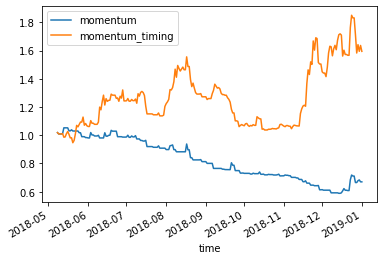

In [112]:
result_momentum_cum.plot()

In [10]:
port_ret

time
2018-05-07 01:00:00    0.000000
2018-05-08 01:00:00    0.000000
2018-05-09 01:00:00    0.003685
2018-05-10 01:00:00   -0.033061
2018-05-11 01:00:00   -0.066895
                         ...   
2021-05-06 01:00:00   -0.009798
2021-05-07 01:00:00   -0.002923
2021-05-08 01:00:00    0.026997
2021-05-09 01:00:00    0.003501
2021-05-10 01:00:00    0.039845
Length: 1100, dtype: float64

### Positive Filtering

In [38]:
df = pd.read_excel("data/usdt_pairs_update.xlsx")
df["time"] = pd.to_datetime(df["time"])
df = df[df["ticker"].isin(["BTCUSDT","ETHUSDT"])]
wide_df = df.pivot_table(columns=["ticker"],index=["time"],values=["close"])

signal_df = wide_df.pct_change(1).shift(1)
ret_df = wide_df.pct_change(1)

signal_df.columns = ["BTCUSDT","ETHUSDT"]
ret_df.columns = ["BTCUSDT","ETHUSDT"]

max_daily_ret = signal_df.max(axis=1)

def check(x):
    
    signal = x == max_daily_ret
    return signal


signal = signal_df.apply(check)



In [39]:
positive_filtering = signal_df>0
new_signal = positive_filtering & signal

In [44]:
port_ret = ret_df[new_signal].fillna(0)
port_ret = port_ret.sum(axis=1)

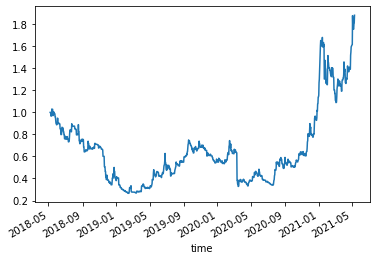

In [45]:
cum_port = (port_ret+1).cumprod().plot()